In [ ]:
import os
import sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('result_25_on.csv')
df[["FSCL_WK_END_DT"]] = df[["FSCL_WK_END_DT"]].apply(pd.to_datetime)
df.set_index('FSCL_WK_END_DT', inplace = True)

In [ ]:
df

,FSCL_WK_END_DT,CURR_YR_SALES_DOLLAR
0,2017-01-14,1605038.77
1,2017-01-21,1507108.65
2,2017-01-28,1802543.79
3,2017-02-04,1512286.73
4,2017-02-11,1999526.10
...,...,...
202,2020-11-28,2246662.30
203,2020-12-05,2138478.83
204,2020-12-12,2783101.14
205,2020-12-19,3042057.94


In [ ]:
df.index

DatetimeIndex(['2017-01-14', '2017-01-21', '2017-01-28', '2017-02-04',
               '2017-02-11', '2017-02-18', '2017-02-25', '2017-03-04',
               '2017-03-11', '2017-03-18',
               ...
               '2020-10-24', '2020-10-31', '2020-11-07', '2020-11-14',
               '2020-11-21', '2020-11-28', '2020-12-05', '2020-12-12',
               '2020-12-19', '2020-12-26'],
              dtype='datetime64[ns]', name='FSCL_WK_END_DT', length=207, freq=None)

In [ ]:
result = seasonal_decompose(df["CURR_YR_SALES_DOLLAR"], model='additive', freq=52)
df['trend'] = result.trend
df['seasonal'] = result.seasonal

In [ ]:
df

,CURR_YR_SALES_DOLLAR,trend,seasonal
FSCL_WK_END_DT,,,
2017-01-14,1605038.77,NaN,-2.162002e+05
2017-01-21,1507108.65,NaN,-4.306381e+05
2017-01-28,1802543.79,NaN,-2.480139e+05
2017-02-04,1512286.73,NaN,-2.479700e+05
2017-02-11,1999526.10,NaN,-6.420630e+04
...,...,...,...
2020-11-28,2246662.30,NaN,8.520228e+04
2020-12-05,2138478.83,NaN,3.023314e+05
2020-12-12,2783101.14,NaN,5.371753e+05


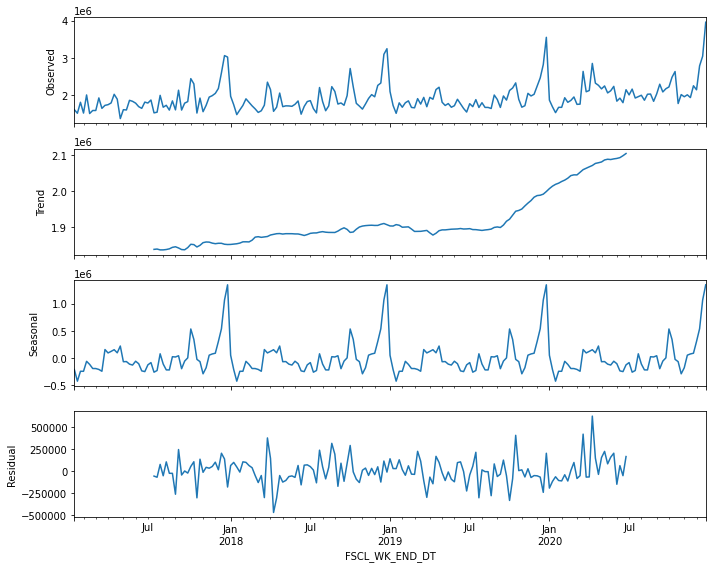

In [ ]:
plt.rcParams['figure.figsize'] = (10, 8)
x = result.plot()

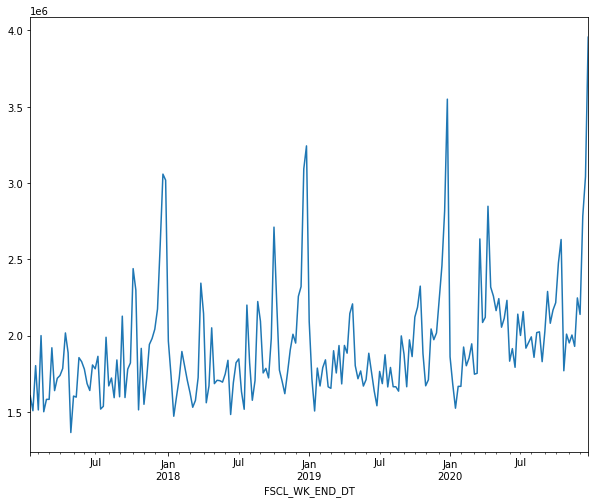

In [ ]:
df['CURR_YR_SALES_DOLLAR'].plot()
plt.show()

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.3MB 69kB/s 
